In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

<h3>Assumptions of Linear Regression</h3>

1. <b>Linearity</b> – There should be linear relationship between dependent and independent variable. This is very logical and most essential assumption of Linear Regression. Visually it can be check by making a scatter plot between dependent and independent variable

2. <b>Homoscedasticity</b> – Constant Error Variance, i.e, the variance of the error term is same across all values of the independent variable. It can be easily checked by making a scatter plot between Residual and Fitted Values. If there is no trend then the variance of error term is constant.

3. <b>Normal Error</b> – The error term should be normally distributed. QQ plot is a good way of checking normality. If the plot forms a line that is roughly straight then we can assume there is normality.

4. <b>No Autocorrelation of residual</b> – This is typically applicable to time series data. Autocorrelation means the current value of Yt is dependent on historic value of Yt-n with n as lag period. Durbin-Watson test is a quick way to find if there is any autocorrelation.

5. <b>No Perfect Multi-Collinearity</b> – Multi-Collinearity is a phenomenon when two or more independent variables are highly correlated. Multi-collinearity is checked by Variance Inflation Factor (VIF). There should be no variable in the model having VIF above 2

6. <b>Exogeneity</b> – Exogeneity is a standard assumption of regression and it means that each X variable does not depend on the dependent variable Y, rather Y depends on the Xs and on Error (e). In simple terms X is completely unaffected by Y

In [2]:
data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted_Date,Summary,Precip_Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51


<h3>Task: To Predict Apparent Temprature (C)</h3>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Formatted_Date        96453 non-null  object 
 1   Summary               96453 non-null  object 
 2   Precip_Type           95936 non-null  object 
 3   Temperature           96453 non-null  float64
 4   Apparent_Temperature  96453 non-null  float64
 5   Humidity              96453 non-null  float64
 6   Wind_Speed            96453 non-null  float64
 7   Wind_Bearing          96453 non-null  int64  
 8   Visibility            96453 non-null  float64
 9   Loud_Cover            96453 non-null  int64  
 10  Pressure              96453 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 8.1+ MB


In [4]:
data.describe()

,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### Checking for Linearity between dependent and independent variables

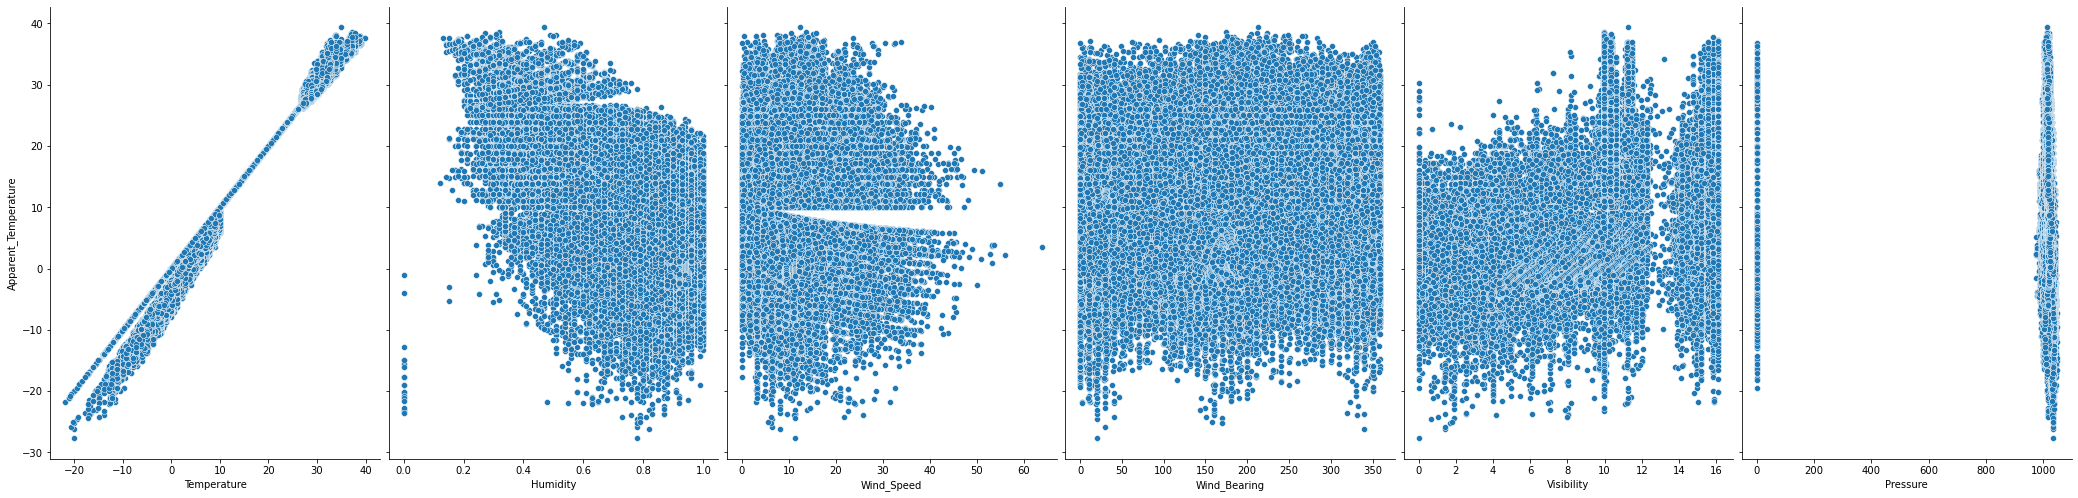

In [5]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(data, x_vars=['Temperature','Humidity','Wind_Speed', 'Wind_Bearing','Visibility','Pressure'], y_vars='Apparent_Temperature', size=7, aspect=0.7)

Remark: Only Temprature is linearly related to Apparent Temprature

Splitting dataset into dependent variable and independent variable

In [6]:
x = data.drop(["Apparent_Temperature","Formatted_Date","Loud_Cover"],axis=1)
y = data.Apparent_Temperature

Encoding Categorical Features

In [7]:
col2enc=x.select_dtypes(include=[object])
encoded_features = pd.get_dummies(col2enc)
encoded_features

,Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Dangerously Windy and Partly Cloudy,Summary_Drizzle,Summary_Dry,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip_Type_rain,Precip_Type_snow
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
96449,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
96450,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
96451,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Getting Non-Categorical Features

In [8]:
numdata=x.select_dtypes(exclude=[object])
numdata

,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure
0,9.472222,0.89,14.1197,251,15.8263,1015.13
1,9.355556,0.86,14.2646,259,15.8263,1015.63
2,9.377778,0.89,3.9284,204,14.9569,1015.94
3,8.288889,0.83,14.1036,269,15.8263,1016.41
4,8.755556,0.83,11.0446,259,15.8263,1016.51
...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31,16.1000,1014.36
96449,24.583333,0.48,10.0947,20,15.5526,1015.16
96450,22.038889,0.56,8.9838,30,16.1000,1015.66
96451,21.522222,0.60,10.5294,20,16.1000,1015.95


Merging Categorical and Non-Categorical Features

In [9]:
df = pd.concat([numdata,encoded_features],axis = 'columns')
df

,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip_Type_rain,Precip_Type_snow
0,9.472222,0.89,14.1197,251,15.8263,1015.13,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,9.355556,0.86,14.2646,259,15.8263,1015.63,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,9.377778,0.89,3.9284,204,14.9569,1015.94,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8.288889,0.83,14.1036,269,15.8263,1016.41,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,8.755556,0.83,11.0446,259,15.8263,1016.51,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31,16.1000,1014.36,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
96449,24.583333,0.48,10.0947,20,15.5526,1015.16,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
96450,22.038889,0.56,8.9838,30,16.1000,1015.66,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
96451,21.522222,0.60,10.5294,20,16.1000,1015.95,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Testing for multicollinearity

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
vif_data

,feature,VIF
0,Temperature,2.590913
1,Humidity,2.120454
2,Wind_Speed,1.497629
3,Wind_Bearing,1.020248
4,Visibility,1.792144
5,Pressure,1.055311
6,Summary_Breezy,1.174024
7,Summary_Breezy and Dry,1.003707
8,Summary_Breezy and Foggy,1.147761
9,Summary_Breezy and Mostly Cloudy,3.003002


Remark: There exists some strong multi-colinearity in the data

In [11]:
df.corr()

,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip_Type_rain,Precip_Type_snow
Temperature,1.000000,-0.632255,0.008957,0.029988,0.392847,-0.005447,-0.009938,0.003094,-0.024820,-0.006444,...,0.299993,-0.001958,-0.004890,0.005154,-0.000038,-0.000196,-0.009047,-0.005423,0.553873,-0.562620
Humidity,-0.632255,1.000000,-0.224951,0.000735,-0.369173,0.005454,-0.011760,-0.007823,0.019852,-0.036710,...,-0.309247,0.011049,-0.007567,-0.008152,0.005439,-0.013149,-0.002899,-0.027798,-0.228314,0.232113
Wind_Speed,0.008957,-0.224951,1.000000,0.103822,0.100749,-0.049263,0.073033,0.010712,0.062467,0.239482,...,-0.070443,-0.007384,0.041306,0.013711,0.031082,0.089033,0.101774,0.128899,0.063988,-0.067928
Wind_Bearing,0.029988,0.000735,0.103822,1.000000,0.047594,-0.011651,0.010031,0.001574,-0.004769,0.027407,...,0.017292,0.002303,0.011216,-0.001125,-0.001950,0.013115,0.011428,0.026421,0.041406,-0.041984
Visibility,0.392847,-0.369173,0.100749,0.047594,1.000000,0.059818,-0.004348,-0.000281,-0.039656,0.019786,...,0.244570,-0.020813,0.000793,-0.000281,-0.012971,0.003692,-0.002788,0.007149,0.317667,-0.312875
Pressure,-0.005447,0.005454,-0.049263,-0.011651,0.059818,1.000000,-0.088893,0.000506,0.000928,-0.001638,...,0.058925,0.001226,-0.068197,0.000467,0.000481,-0.003813,0.000593,-0.011258,-0.011103,0.009008
Summary_Breezy,-0.009938,-0.011760,0.073033,0.010031,-0.004348,-0.088893,1.000000,-0.000076,-0.000451,-0.001736,...,-0.016573,-0.000241,-0.000216,-0.000076,-0.000152,-0.000451,-0.000511,-0.000624,-0.007808,0.008373
Summary_Breezy and Dry,0.003094,-0.007823,0.010712,0.001574,-0.000281,0.000506,-0.000076,1.000000,-0.000061,-0.000236,...,-0.002255,-0.000033,-0.000029,-0.000010,-0.000021,-0.000061,-0.000070,-0.000085,0.001169,-0.001138
Summary_Breezy and Foggy,-0.024820,0.019852,0.062467,-0.004769,-0.039656,0.000928,-0.000451,-0.000061,1.000000,-0.001397,...,-0.013341,-0.000194,-0.000174,-0.000061,-0.000123,-0.000363,-0.000412,-0.000502,-0.038910,0.040043
Summary_Breezy and Mostly Cloudy,-0.006444,-0.036710,0.239482,0.027407,0.019786,-0.001638,-0.001736,-0.000236,-0.001397,1.000000,...,-0.051353,-0.000747,-0.000668,-0.000236,-0.000472,-0.001397,-0.001584,-0.001934,0.015099,-0.014161


## Buidling Model using all the features

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y,random_state = 44,test_size=0.25)

### Linear Regression using sklearn Library

For more info, visit: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [13]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)
print("R squared: {}".format(metrics.r2_score(y_true=y_train,y_pred=y_pred)))
print(f'Coefficients: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

R squared: 0.990112406072637
Coefficients: [ 1.11616324e+00  7.71277561e-01 -1.04639610e-01  5.21880827e-04
  4.30553992e-03  1.49846940e-04 -1.07436750e+00 -3.88578059e-15
 -2.17802781e+00  8.06235947e-01 -1.37202078e-01  6.40445606e-01
 -3.67996534e-01  1.28807778e+00 -8.75501200e-02 -1.07467303e+00
 -1.30798779e+00 -1.00354654e+00 -4.91467245e-02 -3.61716844e-01
 -5.56798460e-01 -5.64981685e-01 -1.63594434e-01 -2.60299974e-01
 -3.57340731e-01 -3.61646092e-01 -1.30938686e-01  4.86123412e-01
  1.55783023e+00  1.55862548e+00  1.83677320e+00  3.86552083e-01
  1.47715130e+00 -4.24028732e-01 -8.64415207e-01]
Intercept: -1.4212970657507746


### Linear Regression using Statsmodel Library
For more info, visit: https://www.statsmodels.org/stable/examples/index.html#linear-regression-models

OLS result interpretation: https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a
https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate

In [14]:
import statsmodels.api as sm
X_constant = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Apparent_Temperature   R-squared:                       0.990
Model:                              OLS   Adj. R-squared:                  0.990
Method:                   Least Squares   F-statistic:                 2.194e+05
Date:                  Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                          11:16:12   Log-Likelihood:            -1.0703e+05
No. Observations:                 72339   AIC:                         2.141e+05
Df Residuals:                     72305   BIC:                         2.144e+05
Df Model:                            33                                         
Covariance Type:              nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -1.3687      0.101    -13.551      0.000      -1.567      -1.171
Temperature                                     1.1162      0.001   1680.332      0.000       1.115       1.117
Humidity                                        0.7713      0.029     26.239      0.000       0.714       0.829
Wind_Speed                                     -0.1046      0.001   -149.717      0.000      -0.106      -0.103
Wind_Bearing                                    0.0005   3.72e-05     14.044      0.000       0.000       0.001
Visibility                                      0.0043      0.001      3.414      0.001       0.002       0.007
Pressure                                        0.0001   3.45e-05      4.344      0.000    8.22e-05       0.000
Summary_Breezy                                 -1.1270      0.172     -6.541      0.000      -1.465      -0.789
Summary_Breezy and Dry                       4.571e-15   8.34e-15      0.548      0.584   -1.18e-14    2.09e-14
Summary_Breezy and Foggy                       -2.2307      0.217    -10.263      0.000      -2.657      -1.805
Summary_Breezy and Mostly Cloudy                0.7536      0.089      8.473      0.000       0.579       0.928
Summary_Breezy and Overcast                    -0.1898      0.088     -2.146      0.032      -0.363      -0.016
Summary_Breezy and Partly Cloudy                0.5878      0.094      6.229      0.000       0.403       0.773
Summary_Clear                                  -0.4206      0.073     -5.728      0.000      -0.565      -0.277
Summary_Dangerously Windy and Partly Cloudy     1.2354      1.025      1.205      0.228      -0.775       3.245
Summary_Drizzle                                -0.1402      0.203     -0.690      0.490      -0.539       0.258
Summary_Dry                                    -1.1273      0.210     -5.371      0.000      -1.539      -0.716
Summary_Dry and Mostly Cloudy                  -1.3606      0.317     -4.295      0.000      -1.982      -0.740
Summary_Dry and Partly Cloudy                  -1.0562      0.145     -7.296      0.000      -1.340      -0.772
Summary_Foggy                                  -0.1018      0.074     -1.366      0.172      -0.248       0.044
Summary_Humid and Mostly Cloudy                -0.4144      0.192     -2.155      0.031      -0.791      -0.037
Summary_Humid and Overcast                     -0.6094      0.463     -1.316      0.188      -1.517       0.298
Summary_Humid and Partly Cloudy                -0.6176      0.266     -2.324      0.020      -1.139      -0.097
Summary_Light Rain                             -0.2162      0.164     -1.316      0.188      -0.538       0.106
Summary_Mostly Cloudy                

### Mean Square Error

In [15]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.7181345517515686e-15


<h3> Check for Homoscedasticity</h3>
Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.
Detecting heteroscedasticity!<br>

Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

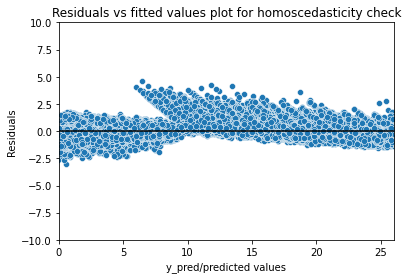

In [16]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='black')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Remark: As these is no clearn patter in error terms, we can consider that the residual have almost equal variance

<h3>Checking for normality in error terms</h3>

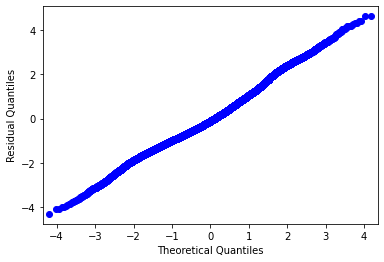

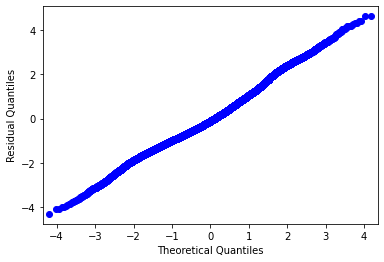

In [17]:
sm.qqplot(residuals, ylabel = "Residual Quantiles" )

Remark: As we have near straight line, we can safely assume that error terms are follows normal distribution

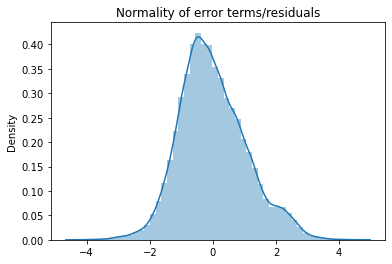

In [18]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

<h3>Checking for Autocorrelation</h3>

Since the Durbin-Watson test has a value of 2.002 (see output of statmodels regression), we can safely assume that no autocorrelation is present

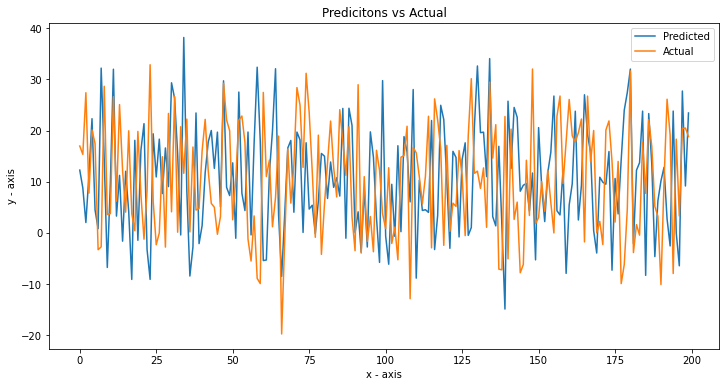

In [19]:
plt.figure(figsize=(12, 6))

plt.plot(y_pred[:200], label = "Predicted")
plt.plot(y_test[:200].values, label = "Actual")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Predicitons vs Actual')
plt.legend()

plt.show()

In [20]:
X_test_constant = sm.add_constant(X_test)
X_test['Predicted Apparent Temprature'] = lin_reg.predict(X_test_constant)
X_test['Apparent Temprature'] = y_test.values
X_test

,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip_Type_rain,Precip_Type_snow,Predicted Apparent Temprature,Apparent Temprature
87824,16.966667,0.42,19.2717,292,15.5526,1014.80,0,0,0,0,...,0,0,0,0,0,0,1,0,15.409367,16.966667
75218,15.344444,0.82,3.1556,353,15.1823,1019.97,0,0,0,0,...,0,0,0,0,0,0,1,0,15.618261,15.344444
9783,28.888889,0.20,6.6010,160,9.9820,1015.68,0,0,0,0,...,0,0,0,0,0,0,1,0,29.779949,27.383333
89892,9.977778,0.87,16.1805,270,9.9820,1020.86,0,0,0,0,...,0,0,0,0,0,0,1,0,8.248911,7.761111
39926,20.100000,0.73,22.6688,355,11.4471,1014.97,0,0,0,0,...,0,0,0,0,0,0,1,0,18.805531,20.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91908,32.733333,0.41,17.4202,161,16.1000,1012.39,0,0,0,0,...,0,0,0,0,0,0,1,0,33.127198,33.588889
7600,14.405556,0.56,4.8783,170,9.9820,1010.75,0,0,0,0,...,0,0,0,0,0,0,1,0,14.177933,14.405556
53304,3.888889,0.59,14.4900,20,16.1000,1009.00,0,0,0,0,...,0,0,0,0,0,0,1,0,1.307746,0.477778
62157,22.105556,0.59,17.2592,320,16.1000,1013.29,0,0,0,0,...,0,0,0,0,0,0,1,0,21.605000,22.105556


In [21]:
X_test.to_csv('weatherHistoryPredicted.csv',index = False)

## Buidling Model using Non-Categorical features only

<h3>Checking for multicolinearity</h3>

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = numdata.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numdata.values, i)
                          for i in range(len(numdata.columns))]
  
vif_data

,feature,VIF
0,Temperature,3.928052
1,Humidity,18.036017
2,Wind_Speed,3.468936
3,Wind_Bearing,4.075435
4,Visibility,8.367566
5,Pressure,33.304352


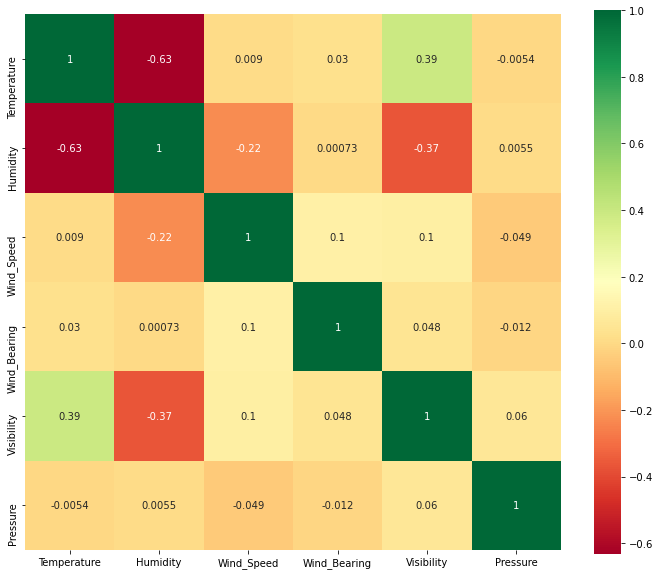

In [23]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(numdata.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numdata, y,random_state = 44,test_size=0.25)
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)
print("R squared: {}".format(metrics.r2_score(y_true=y_train,y_pred=y_pred)))
print(f'Coefficients: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

R squared: 0.9898127173548735
Coefficients: [ 1.12559707e+00  1.01825051e+00 -9.59879643e-02  5.39386434e-04
 -8.98484938e-04  2.13723698e-04]
Intercept: -2.589195498524308


In [25]:
import statsmodels.api as sm

X_constant = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Apparent_Temperature   R-squared:                       0.990
Model:                              OLS   Adj. R-squared:                  0.990
Method:                   Least Squares   F-statistic:                 1.171e+06
Date:                  Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                          11:16:21   Log-Likelihood:            -1.0811e+05
No. Observations:                 72339   AIC:                         2.162e+05
Df Residuals:                     72332   BIC:                         2.163e+05
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.5892      0.046    -56.460      0.000      -2.679      -2.499
Temperature      1.1256      0.001   1989.957      0.000       1.124       1.127
Humidity         1.0183      0.028     36.502      0.000       0.964       1.073
Wind_Speed      -0.0960      0.001   -157.281      0.000      -0.097      -0.095
Wind_Bearing     0.0005   3.76e-05     14.330      0.000       0.000       0.001
Visibility      -0.0009      0.001     -0.846      0.397      -0.003       0.001
Pressure         0.0002   3.42e-05      6.251      0.000       0.000       0.000
==============================================================================
Omnibus:                     1350.963   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1491.058
Skew:                           0.309   Prob(JB):                         0.00
Kurtosis:                       3.337   Cond. No.                     1.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Mean Square Error

In [26]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.1649368730718959e-15


<h3> Check for Homoscedasticity</h3>
Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.
Detecting heteroscedasticity!<br>

Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

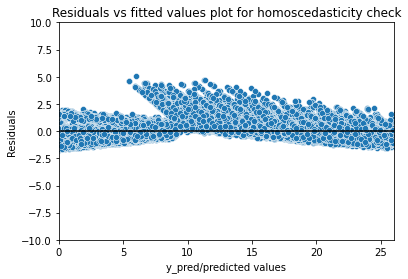

In [27]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='black')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Remark: As these is no clearn patter in error terms, we can consider that the residual have almost equal variance

<h3>Checking for normality in error terms

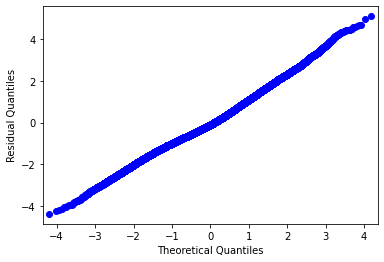

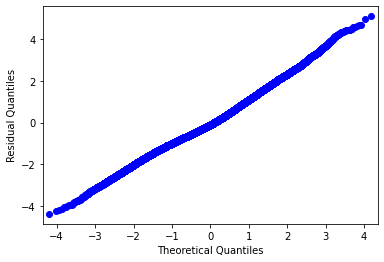

In [28]:
sm.qqplot(residuals, ylabel = "Residual Quantiles" )

Remark: As we have near straight line, we can safely assume that error terms are follows normal distribution

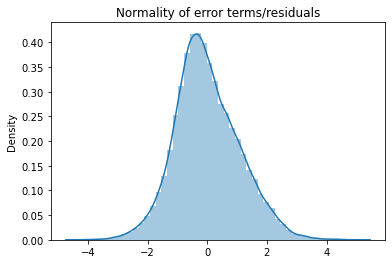

In [29]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

<h3>Checking for Autocorrelation</h3>

Since the Durbin-Watson test has a value of 2.001 (see output of statmodels regression), we can safely assume that no autocorrelation is present

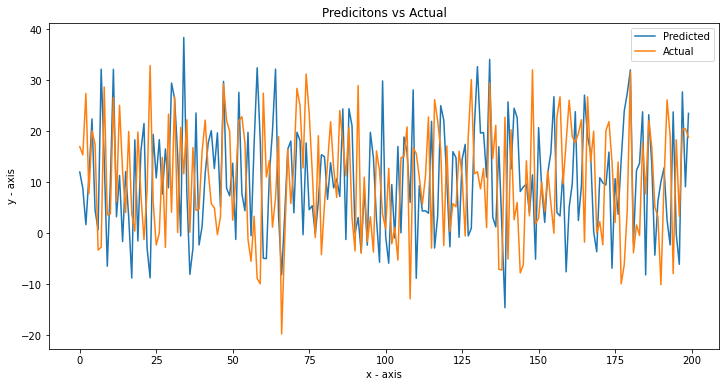

In [30]:
plt.figure(figsize=(12, 6))

plt.plot(y_pred[:200], label = "Predicted")
plt.plot(y_test[:200].values, label = "Actual")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Predicitons vs Actual')
plt.legend()

plt.show()

In [31]:
X_test_constant = sm.add_constant(X_test)
X_test['Predicted Apparent Temprature'] = lin_reg.predict(X_test_constant)
X_test['Apparent Temprature'] = y_test.values
X_test

,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Predicted Apparent Temprature,Apparent Temprature
87824,16.966667,0.42,19.2717,292,15.5526,1014.80,15.446663,16.966667
75218,15.344444,0.82,3.1556,353,15.1823,1019.97,15.609286,15.344444
9783,28.888889,0.20,6.6010,160,9.9820,1015.68,29.792495,27.383333
89892,9.977778,0.87,16.1805,270,9.9820,1020.86,8.329354,7.761111
39926,20.100000,0.73,22.6688,355,11.4471,1014.97,19.000817,20.100000
...,...,...,...,...,...,...,...,...
91908,32.733333,0.41,17.4202,161,16.1000,1012.39,33.289449,33.588889
7600,14.405556,0.56,4.8783,170,9.9820,1010.75,14.026366,14.405556
53304,3.888889,0.59,14.4900,20,16.1000,1009.00,1.209998,0.477778
62157,22.105556,0.59,17.2592,320,16.1000,1013.29,21.611548,22.105556


In [32]:
X_test.to_csv('weatherHistoryPredictedParametric.csv',index = False)